# Sentiment Analysis

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

File ‘AirlineTweets.csv’ already there; not retrieving.



In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('AirlineTweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df = df[['airline_sentiment', 'text', 'airline_sentiment_confidence']]
df.head()

,airline_sentiment,text,airline_sentiment_confidence
0,neutral,@VirginAmerica What @dhepburn said.,1.0000
1,positive,@VirginAmerica plus you've added commercials t...,0.3486
2,neutral,@VirginAmerica I didn't today... Must mean I n...,0.6837
3,negative,@VirginAmerica it's really aggressive to blast...,1.0000
4,negative,@VirginAmerica and it's a really big bad thing...,1.0000


<AxesSubplot: >

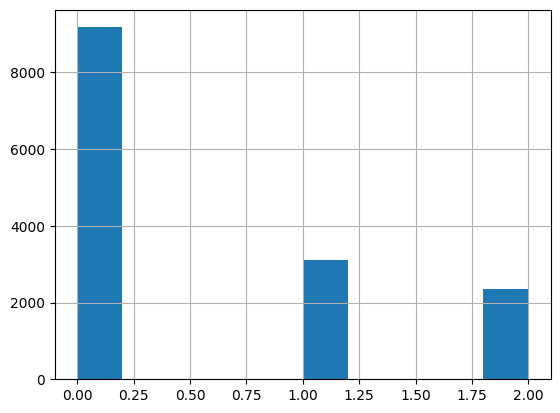

In [5]:
labels = df['airline_sentiment'].map({'positive': 2, 'negative': 0, 'neutral': 1})
inputs = df['text']
weights = df['airline_sentiment_confidence']
inputs_train, inputs_test, Ytrain, Ytest, Wtrain, Wtest = train_test_split(inputs, labels, weights)
labels.hist()

In [6]:
vectorizer = CountVectorizer()
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
Xtrain, Xtest

(<10980x12827 sparse matrix of type '<class 'numpy.int64'>'
 	with 176054 stored elements in Compressed Sparse Row format>,
 <3660x12827 sparse matrix of type '<class 'numpy.int64'>'
 	with 55883 stored elements in Compressed Sparse Row format>)

In [7]:
model = LogisticRegression(max_iter=200)
model.fit(Xtrain, Ytrain, Wtrain)
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

In [8]:
model.score(Xtrain, Ytrain, Wtrain), model.score(Xtest, Ytest, Wtest)

(0.9560047607201234, 0.8235395091522979)

In [9]:
(
    f1_score(Ytrain, Ptrain, average='weighted', sample_weight=Wtrain),
    f1_score(Ytest, Ptest, average='weighted', sample_weight=Wtest)
)

(0.9555213425628821, 0.8209537906148531)

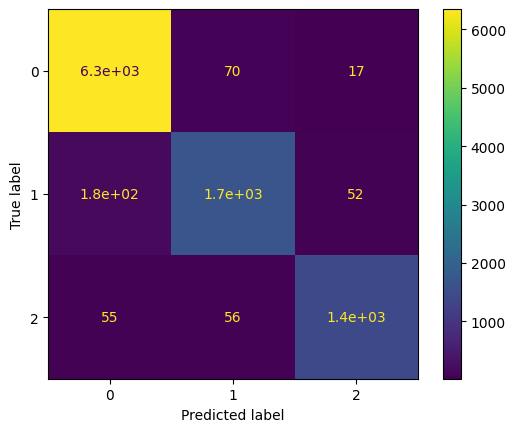

In [10]:
ConfusionMatrixDisplay.from_predictions(Ytrain, Ptrain, sample_weight=Wtrain)

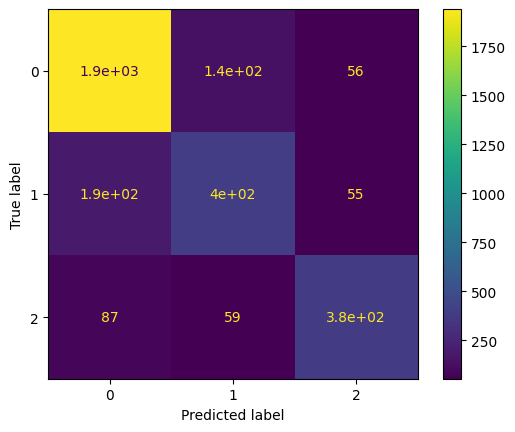

In [11]:
ConfusionMatrixDisplay.from_predictions(Ytest, Ptest, sample_weight=Wtest)

In [12]:
df = df[df['airline_sentiment'] != 'neutral']
df.head()

,airline_sentiment,text,airline_sentiment_confidence
1,positive,@VirginAmerica plus you've added commercials t...,0.3486
3,negative,@VirginAmerica it's really aggressive to blast...,1.0000
4,negative,@VirginAmerica and it's a really big bad thing...,1.0000
5,negative,@VirginAmerica seriously would pay $30 a fligh...,1.0000
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",0.6745


In [13]:
labels = df['airline_sentiment'].map({'positive': 1, 'negative': 0})
inputs = df['text']
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(inputs, labels)
vectorizer = CountVectorizer()
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = LogisticRegression(max_iter=200)
model.fit(Xtrain, Ytrain)
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
(
    (model.score(Xtrain, Ytrain), model.score(Xtest, Ytest)),
    (f1_score(Ytrain, Ptrain, average='weighted'), f1_score(Ytest, Ptest, average='weighted'))
)

((0.9812824956672443, 0.9216909216909217),
 (0.981098522926757, 0.919784594775107))

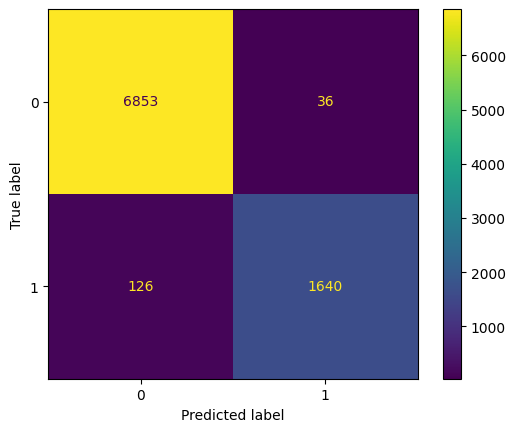

In [14]:
ConfusionMatrixDisplay.from_predictions(Ytrain, Ptrain)

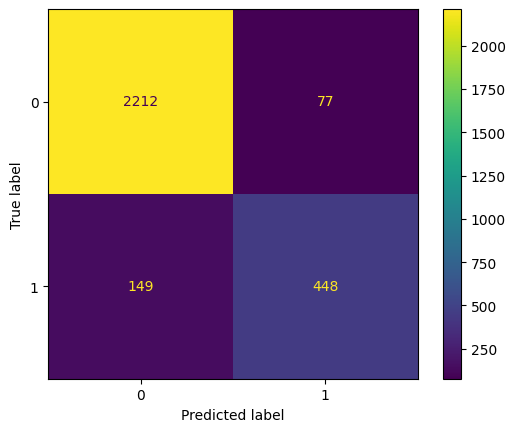

In [15]:
ConfusionMatrixDisplay.from_predictions(Ytest, Ptest)

In [16]:
reverse_vocab = {v: k for k, v in vectorizer.vocabulary_.items()}

In [17]:
list(map(reverse_vocab.__getitem__, model.coef_[0].argsort()[:10]))

['worst',
 'luggage',
 'hours',
 'rude',
 'delayed',
 'hold',
 'hrs',
 'doesn',
 'nothing',
 'not']

In [18]:
list(map(reverse_vocab.__getitem__, (-model.coef_[0]).argsort()[:10]))

['thank',
 'worries',
 'thanks',
 'amazing',
 'awesome',
 'great',
 'love',
 'impressed',
 'kudos',
 'excellent']

In [25]:
X = vectorizer.transform(inputs)
Pr = model.predict_proba(X)
Pr

array([[2.68841516e-01, 7.31158484e-01],
       [6.60730047e-01, 3.39269953e-01],
       [5.42593828e-01, 4.57406172e-01],
       ...,
       [3.21219562e-02, 9.67878044e-01],
       [9.99914654e-01, 8.53460298e-05],
       [9.98619987e-01, 1.38001287e-03]])

In [26]:
Prneg = Pr.T[0].T
Prneg

array([0.26884152, 0.66073005, 0.54259383, ..., 0.03212196, 0.99991465,
       0.99861999])

In [27]:
for i in (-Prneg).argsort():
    if labels.iloc[i] == 1:
        print(i, Prneg[i], inputs.iloc[i])
        break

2498 0.9972095038568926 @united I especially like how you upgraded three of your crew members to first class instead of passengers. #keepitclassy #customerservice


In [29]:
Prpos = Pr.T[1].T
for i in (-Prpos).argsort():
    if labels.iloc[i] == 0:
        print(i, Prpos[i], inputs.iloc[i])
        break

5573 0.9990551494223722 @JetBlue thank you for not even coming with a solution. Great service I might say...as a TrueBlue member I am totally dissatisfied...thanks
